In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\covid_19_india\covid_19_clean_complete.csv',parse_dates=['Date'])

In [3]:
df.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [4]:
df.rename(columns = {'Date': 'date',
                      'Province/State': 'state',
                      'Country/Region': 'country',},inplace = True)


In [5]:
df.head()

state    country      Lat      Long       date  Confirmed  Deaths  Recovered
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0        0.0
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0        0.0
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0        0.0
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0        0.0
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0        0.0

In [6]:
df['active']=df['Confirmed']-df['Deaths']-df['Recovered']
                                             


In [7]:
df.head()


state    country      Lat      Long       date  Confirmed  Deaths  \
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0   
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0   
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0   
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0   
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0   

   Recovered  active  
0        0.0     2.0  
1        0.0     2.0  
2        0.0     0.0  
3        0.0     0.0  
4        0.0     0.0

In [8]:
top_date=df[df['date']==df['date'].max()]


In [9]:
world=top_date.groupby('country')['Confirmed','Deaths','active'].sum().reset_index()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12536\3379254199.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world=top_date.groupby('country')['Confirmed','Deaths','active'].sum().reset_index()


In [10]:
world.head()



country  Confirmed  Deaths  active
0  Afghanistan       40.0     1.0    38.0
1      Albania       89.0     2.0    85.0
2      Algeria      201.0    17.0   119.0
3      Andorra      113.0     1.0   111.0
4       Angola        2.0     0.0     2.0

In [11]:
figure=px.choropleth(world,locations = 'country',
                        locationmode = 'country names', color = 'active',
                        hover_name = 'country', range_color = [1,1000],
                        color_continuous_scale = "blues",
                        title = "Countries with Active Cases")
figure.show()

In [12]:
total_cases=df.groupby('date')['date','Confirmed'].sum().reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12536\4100030161.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [13]:
total_cases.head()

date  Confirmed
0 2020-01-22      554.0
1 2020-01-23      652.0
2 2020-01-24      939.0
3 2020-01-25     1432.0
4 2020-01-26     2113.0

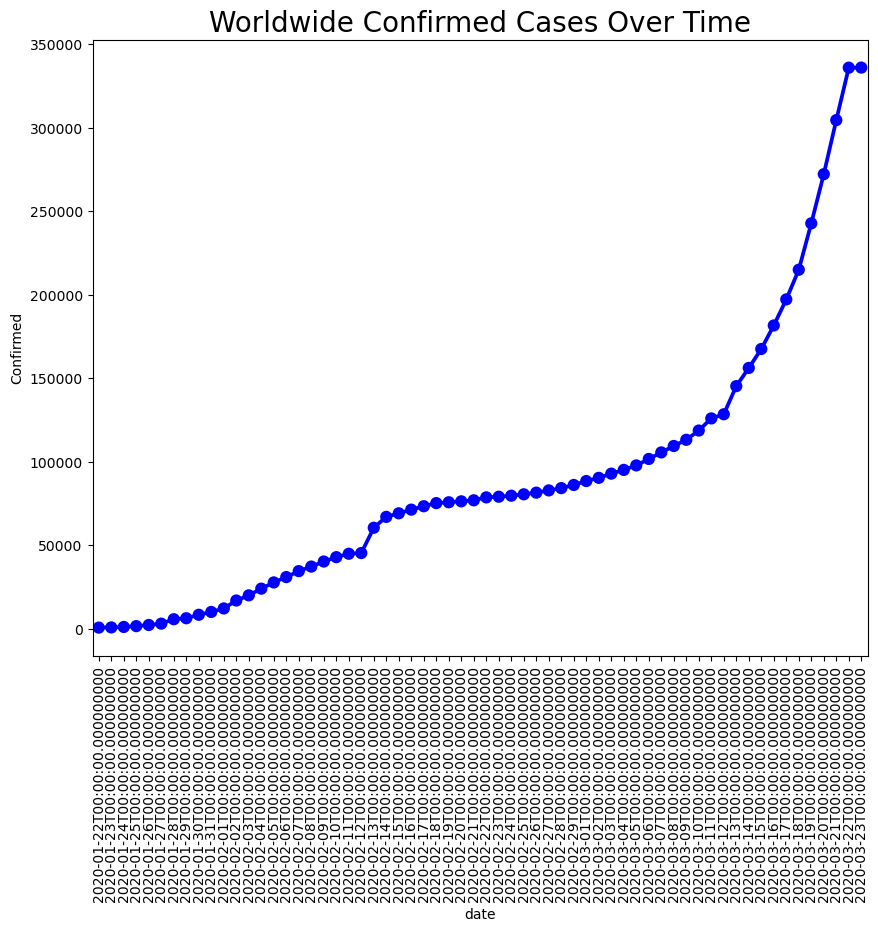

In [14]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 90, fontsize= 10)
plt.xlabel("Dates")
plt.ylabel("Total Cases")
plt.title("Worldwide Confirmed Cases Over Time", fontsize = 20)
ax = sns.pointplot(x = total_cases.date, y = total_cases.Confirmed, color = 'blue')
plt.show()

In [16]:
top_actives=top_date.groupby('country')['active'].sum().sort_values(ascending=False).reset_index().head(20)
top_actives.head()

country   active
0    Italy  46638.0
1       US  32681.0
2  Germany  24513.0
3    Spain  24421.0
4   France  13170.0

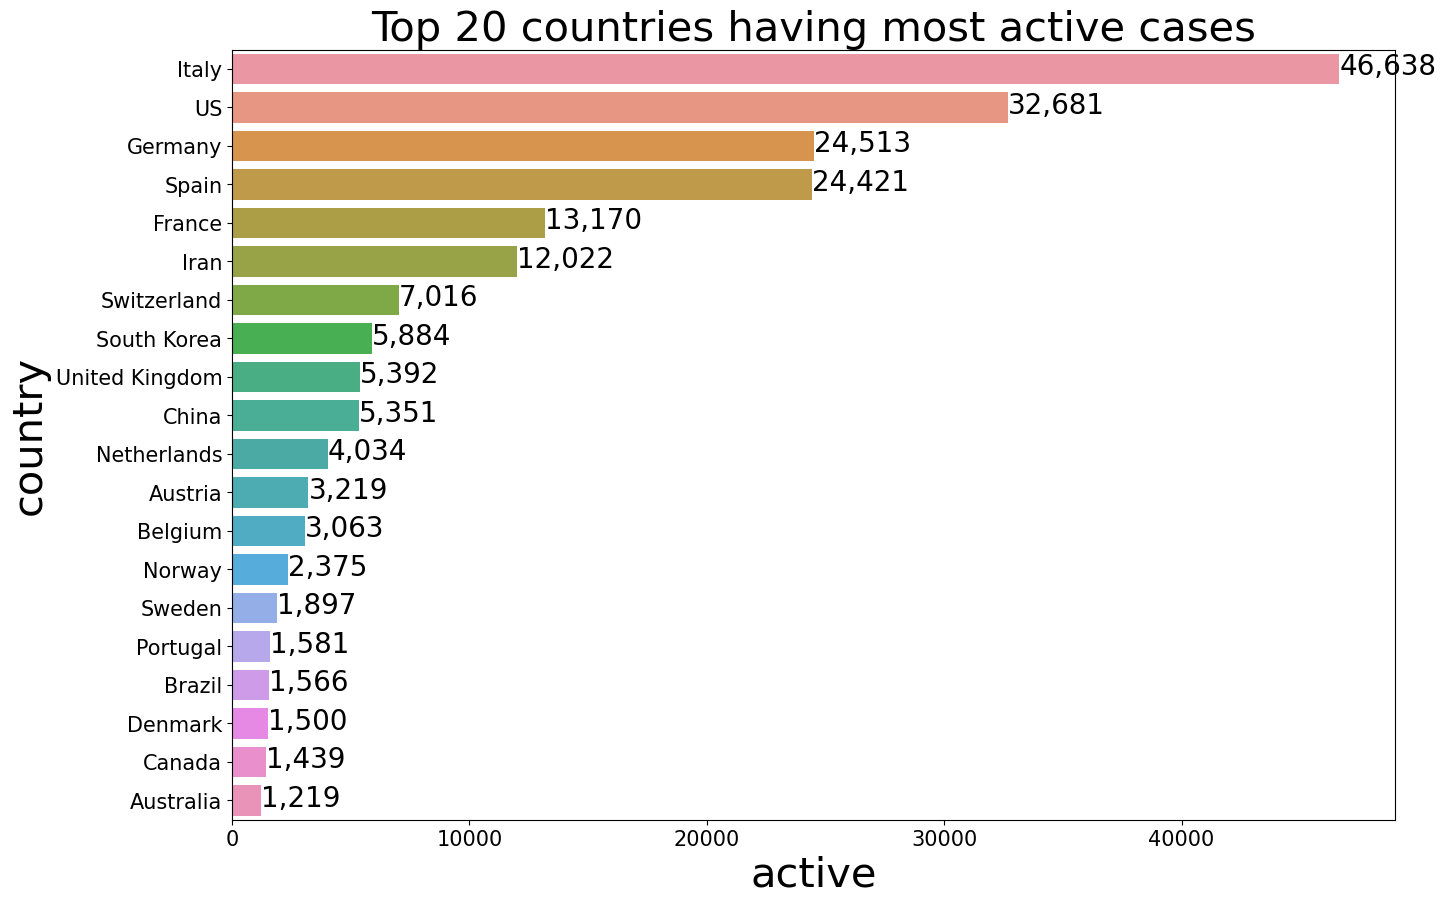

In [17]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize= 15)
plt.yticks (fontsize = 15)
plt.xlabel("Total Cases", fontsize = 30)
plt.ylabel("Country", fontsize = 30)
plt.title("Top 20 countries having most active cases", fontsize = 30)

ax = sns.barplot(x = top_actives.active, y = top_actives.country)

for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=20, ha ='left', va = 'center')

In [18]:
italy=df[df.country=='Italy']
italy=italy.groupby(by='date')['Confirmed','Recovered','Deaths','active'].sum().reset_index()
italy= italy.iloc[9:].reset_index().drop('index', axis = 1)



C:\Users\Admin\AppData\Local\Temp\ipykernel_12536\3466908754.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [19]:
italy.head()

date  Confirmed  Recovered  Deaths  active
0 2020-01-31        2.0        0.0     0.0     2.0
1 2020-02-01        2.0        0.0     0.0     2.0
2 2020-02-02        2.0        0.0     0.0     2.0
3 2020-02-03        2.0        0.0     0.0     2.0
4 2020-02-04        2.0        0.0     0.0     2.0

In [21]:
china = df[df.country == 'China']
china= china.groupby(by = 'date')['Recovered', 'Deaths', 'Confirmed', 'active'].sum().reset_index()
china.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12536\1404690478.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



date  Recovered  Deaths  Confirmed  active
0 2020-01-22       28.0    17.0      548.0   503.0
1 2020-01-23       30.0    18.0      643.0   595.0
2 2020-01-24       36.0    26.0      920.0   858.0
3 2020-01-25       39.0    42.0     1406.0  1325.0
4 2020-01-26       49.0    56.0     2075.0  1970.0

In [22]:
us = df[df.country == 'US']
us = us.groupby(by = 'date')['Recovered', 'Deaths', 'Confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis = 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12536\1973224728.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [23]:
us.head()

date  Recovered  Deaths  Confirmed  active
0 2020-02-24        0.0     0.0       36.0    36.0
1 2020-02-25        0.0     0.0       36.0    36.0
2 2020-02-26        0.0     0.0       42.0    42.0
3 2020-02-27        0.0     0.0       42.0    42.0
4 2020-02-28        0.0     0.0       44.0    44.0

In [24]:
df.head()

state    country      Lat      Long       date  Confirmed  Deaths  \
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0   
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0   
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0   
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0   
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0   

   Recovered  active  
0        0.0     2.0  
1        0.0     2.0  
2        0.0     0.0  
3        0.0     0.0  
4        0.0     0.0

In [25]:
india = df[df.country == 'India']
india = india.groupby(by = 'date')['Recovered', 'Deaths', 'Confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis = 1)
india.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12536\23162185.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



date  Recovered  Deaths  Confirmed  active
0 2020-01-30        0.0     0.0        1.0     1.0
1 2020-01-31        0.0     0.0        1.0     1.0
2 2020-02-01        0.0     0.0        1.0     1.0
3 2020-02-02        0.0     0.0        2.0     2.0
4 2020-02-03        0.0     0.0        3.0     3.0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:3

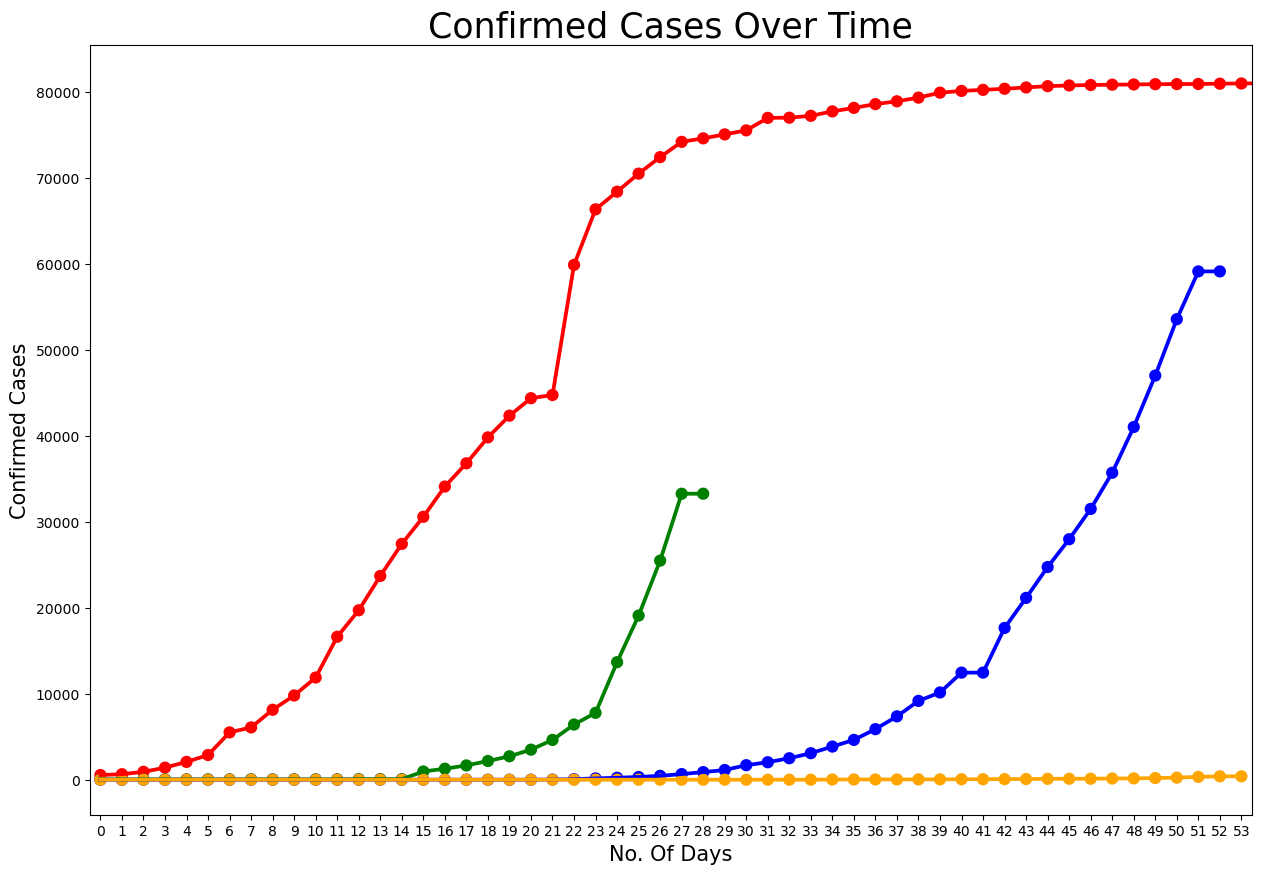

In [26]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.Confirmed, color='red')
sns.pointplot(us.index, us.Confirmed, color='green')
sns.pointplot(italy.index, italy.Confirmed, color='blue')
sns.pointplot(india.index, india.Confirmed, color='orange')
plt.title('Confirmed Cases Over Time', fontsize = 25)

plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Confirmed Cases', fontsize = 15)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:3

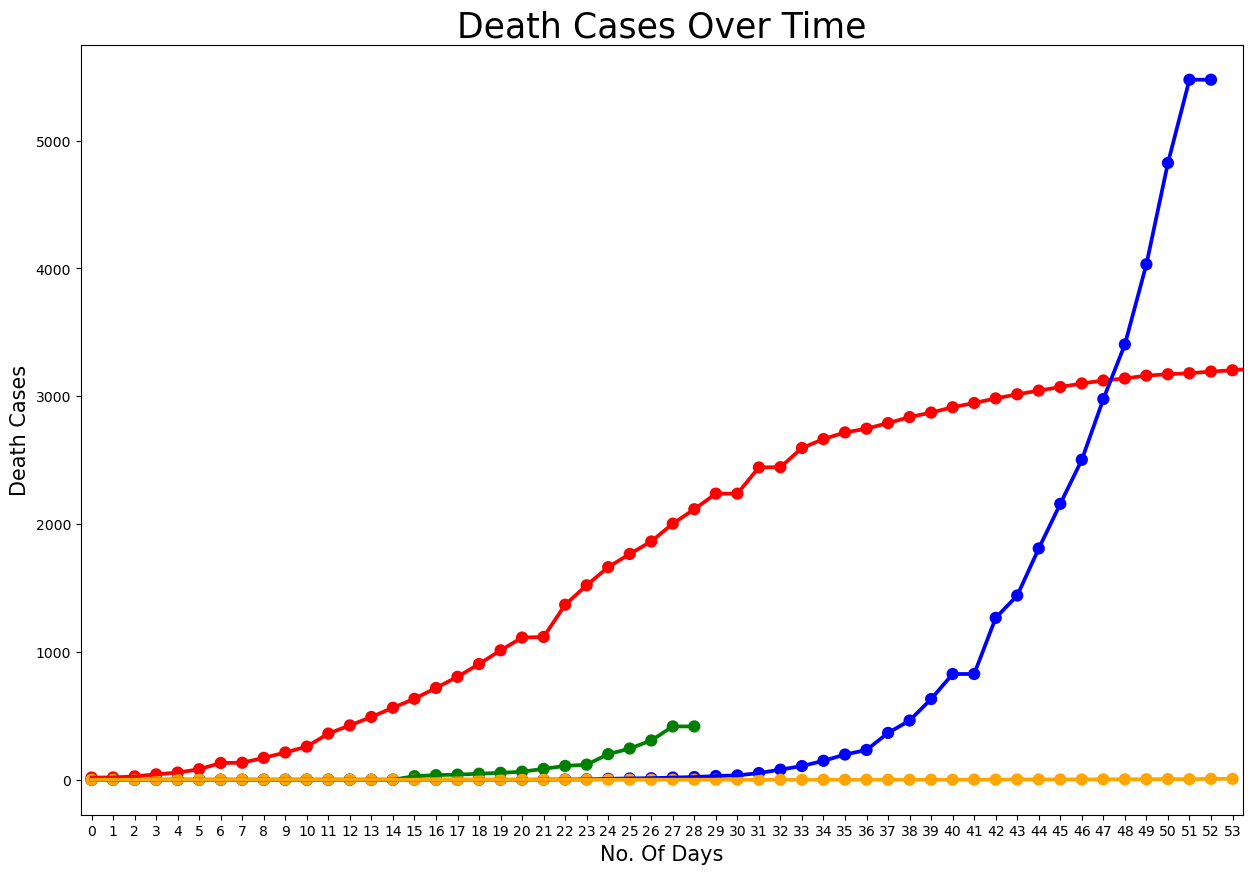

In [27]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.Deaths, color='red')
sns.pointplot(us.index, us.Deaths, color='green')
sns.pointplot(italy.index, italy.Deaths, color='blue')
sns.pointplot(india.index, india.Deaths, color='orange')
plt.title('Death Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Death Cases', fontsize = 15)
plt.show()


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:3

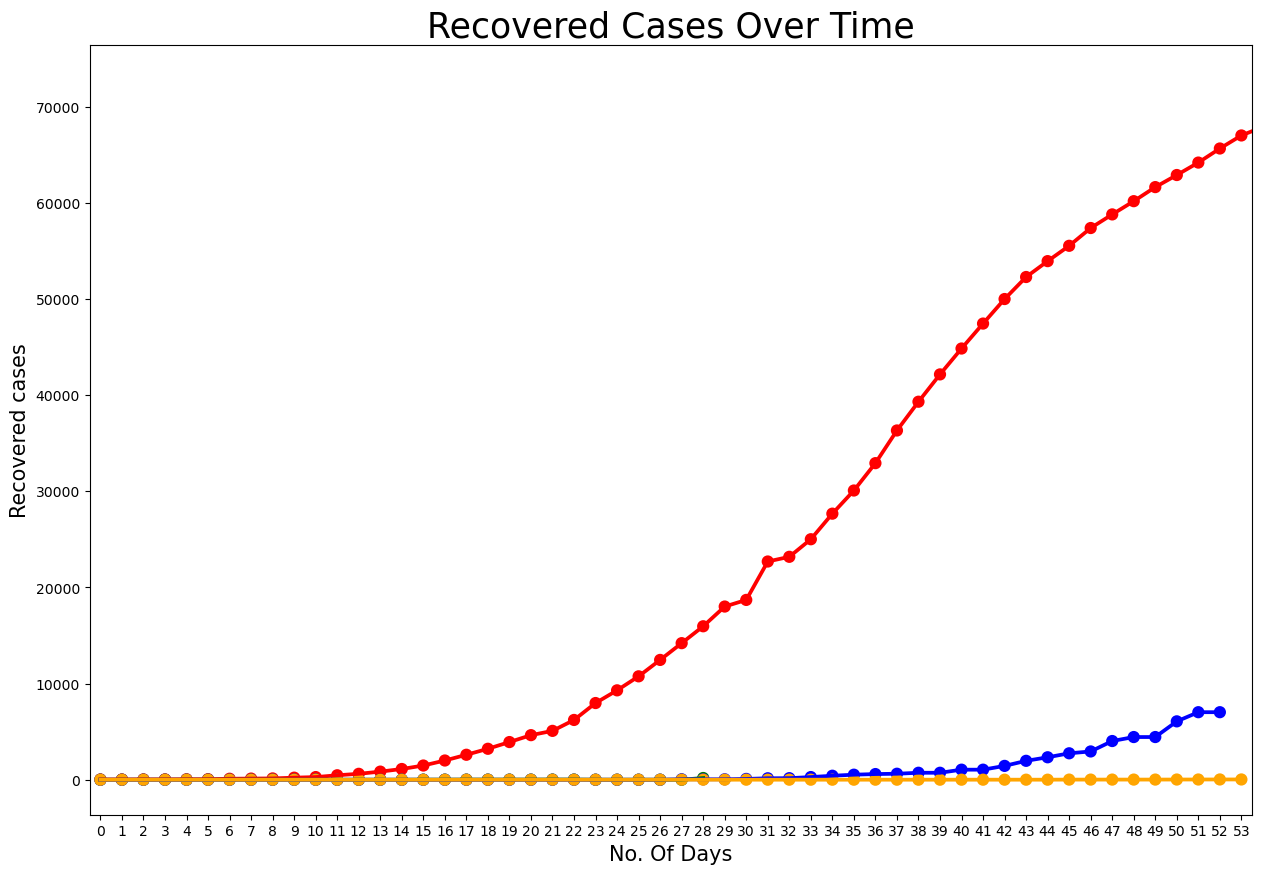

In [28]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.Recovered, color='red')
sns.pointplot(us.index, us.Recovered, color='green')
sns.pointplot(italy.index, italy.Recovered, color='blue')
sns.pointplot(india.index, india.Recovered, color='orange')
plt.title('Recovered Cases Over Time', fontsize = 25)
plt.xlabel('No. Of Days', fontsize = 15)
plt.ylabel('Recovered cases', fontsize = 15)
plt.show()

In [29]:
df_india = pd.read_excel(r'C:\Users\Admin\Downloads\covid_19_india.xlsx')
df_india.head()

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0       1     Andhra Pradesh                                        9   
1       2              Bihar                                        3   
2       3       Chhattisgarh                                        1   
3       4              Delhi                                       30   
4       5            Gujarat                                       32   

   Total Confirmed cases ( Foreign National )  Cured  Death  
0                                           0      0      0  
1                                           0      0      1  
2                                           0      0      0  
3                                           1      6      1  
4                                           1      0      1

In [30]:
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']

In [31]:
df_india['Total Cases'].head()

0     9
1     3
2     1
3    31
4    33
Name: Total Cases, dtype: int64

In [32]:
df_india['Total_active']=df_india['Total Cases']-(df_india['Death']+df_india['Cured'])

In [33]:
df_india['Total_active']

0       9
1       2
2       1
3      24
4      32
5      17
6       2
7      37
8     105
9       9
10     99
11      1
12      1
13      2
14      1
15     28
16     29
17     17
18     34
19      7
20      6
21     13
22     24
23      4
24      8
Name: Total_active, dtype: int64

In [34]:
df_india.head()

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0       1     Andhra Pradesh                                        9   
1       2              Bihar                                        3   
2       3       Chhattisgarh                                        1   
3       4              Delhi                                       30   
4       5            Gujarat                                       32   

   Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  \
0                                           0      0      0            9   
1                                           0      0      1            3   
2                                           0      0      0            1   
3                                           1      6      1           31   
4                                           1      0      1           33   

   Total_active  
0             9  
1             2  
2             1  
3            24  
4            32

In [35]:
total_active=df_india['Total_active'].sum()
print('Total number covid 19 cases across india',total_active)
total_india_cases=df_india.groupby('Name of State / UT')['Total_active'].sum().sort_values(ascending=False).reset_index()
total_india_cases


Total number covid 19 cases across india 512


Name of State / UT  Total_active
0              Kerala           105
1         Maharashtra            99
2           Karnataka            37
3           Telengana            34
4             Gujarat            32
5           Rajasthan            29
6              Punjab            28
7       Uttar Pradesh            24
8               Delhi            24
9             Haryana            17
10         Tamil Nadu            17
11             Ladakh            13
12     Andhra Pradesh             9
13     Madhya Pradesh             9
14        West Bengal             8
15         Chandigarh             7
16  Jammu and Kashmir             6
17        Uttarakhand             4
18             Odisha             2
19              Bihar             2
20   Himachal Pradesh             2
21            Manipur             1
22            Mizoram             1
23         Puducherry             1
24       Chhattisgarh             1

C:\Users\Admin\AppData\Local\Temp\ipykernel_12536\4120320784.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[Text(0, 0.5, 'States and UT'), Text(0.5, 0, 'Cases')]

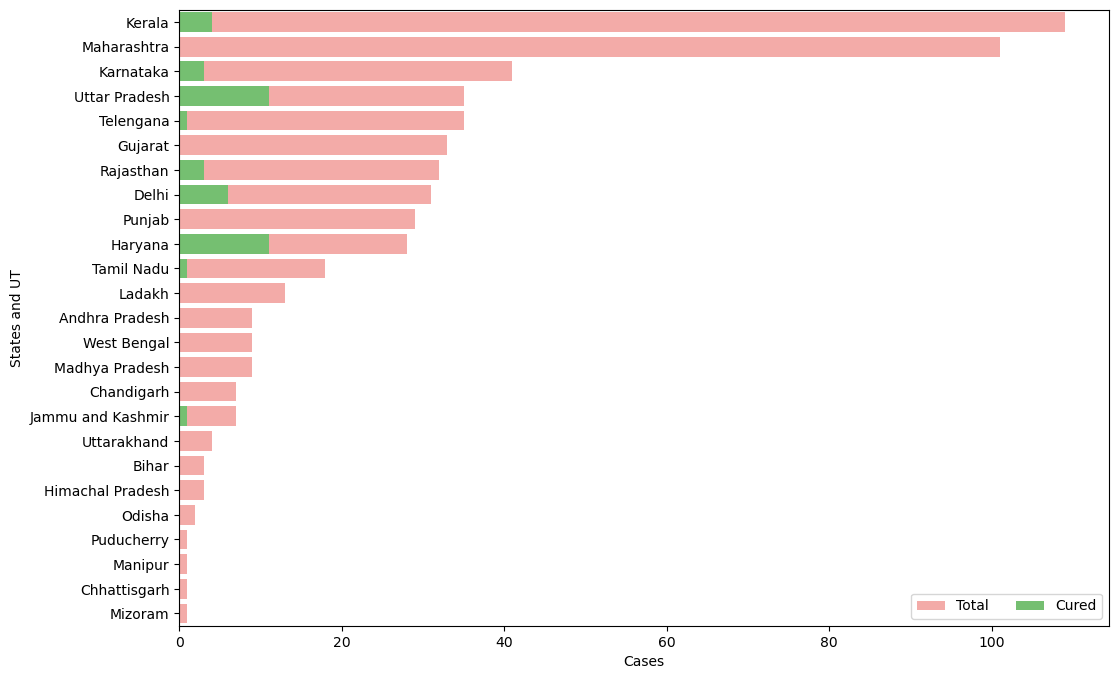

In [36]:
f,ax= plt.subplots(figsize=(12,8))
data = df_india[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases', ascending=False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total", color ="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color ="g")

ax.legend(ncol=2, loc="lower right", frameon = True)
ax.set(ylabel="States and UT", xlabel="Cases")

In [37]:
dbd_india=pd.read_excel(r'C:\Users\Admin\Downloads\covid_19_india\per_day_cases.xlsx',parse_dates=True,sheet_name='India')

In [38]:
dbd_india.head()

Date  Total Cases  New Cases  Days after surpassing 100 cases
0 2020-01-30            1          1                              NaN
1 2020-01-31            1          0                              NaN
2 2020-02-01            1          0                              NaN
3 2020-02-02            2          1                              NaN
4 2020-02-03            3          1                              NaN

In [39]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y=dbd_india['Total Cases'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus cases in India (Cumulative Cases)')
fig.show()
fig = px.bar(dbd_india, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis')
fig.show()

In [40]:
df_confirmed = pd.read_csv(r'C:\Users\Admin\Downloads\covid_19_india\time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv(r'C:\Users\Admin\Downloads\covid_19_india\time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv(r'C:\Users\Admin\Downloads\covid_19_india\time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns = {'Country/Region':'Country'}, inplace=True)

In [41]:
df_confirmed.head()


Province/State      Country      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.0000  65.0000        0        0        0   
1            NaN      Albania  41.1533  20.1683        0        0        0   
2            NaN      Algeria  28.0339   1.6596        0        0        0   
3            NaN      Andorra  42.5063   1.5218        0        0        0   
4            NaN       Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/15/20  3/16/20  3/17/20  3/18/20  \
0        0        0        0  ...       16       21       22       22   
1        0        0        0  ...       42       51       55       59   
2        0        0        0  ...       48       54       60       74   
3        0        0        0  ...        1        2       39       39   
4        0        0        0  ...        0        0        0        0   

   3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  
0       22       24       24       40       40       74  
1       64       70       76       89      104      123  
2       87       90      139      201      230      264  
3       53       75       88      113      133      164  
4        0        1        2        2        3        3  

[5 rows x 67 columns]

In [42]:
df_recovered.head()

Province/State    Country      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN   Thailand  15.0000  101.0000        0        0        0   
1            NaN      Japan  36.0000  138.0000        0        0        0   
2            NaN  Singapore   1.2833  103.8333        0        0        0   
3            NaN      Nepal  28.1667   84.2500        0        0        0   
4            NaN   Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  3/16/20  3/17/20  \
0        0        2        2  ...       35       35       35       41   
1        0        1        1  ...      118      118      144      144   
2        0        0        0  ...      105      105      109      114   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...       35       42       42       49   

   3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0       42       42       42       42       44     44.0  
1      144      150      191      232      235    235.0  
2      114      114      124      140      144    144.0  
3        1        1        1        1        1      1.0  
4       60       75       87      114      139    139.0  

[5 rows x 66 columns]

In [43]:
df_deaths.head()

Province/State      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.93911  67.709953        0        0        0   
1            NaN      Albania  41.15330  20.168300        0        0        0   
2            NaN      Algeria  28.03390   1.659600        0        0        0   
3            NaN      Andorra  42.50630   1.521800        0        0        0   
4            NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  12/3/22  12/4/22  12/5/22  12/6/22  \
0        0        0        0  ...     7834     7834     7835     7835   
1        0        0        0  ...     3594     3594     3594     3594   
2        0        0        0  ...     6881     6881     6881     6881   
3        0        0        0  ...      157      157      157      157   
4        0        0        0  ...     1924     1924     1925     1925   

   12/7/22  12/8/22  12/9/22  12/10/22  12/11/22  12/12/22  
0     7837     7839     7839      7839      7839      7840  
1     3594     3594     3594      3594      3594      3594  
2     6881     6881     6881      6881      6881      6881  
3      158      158      158       158       158       158  
4     1925     1925     1925      1925      1925      1925  

[5 rows x 1060 columns]

In [44]:
df.head()

state    country      Lat      Long       date  Confirmed  Deaths  \
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0   
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0   
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0   
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0   
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0   

   Recovered  active  
0        0.0     2.0  
1        0.0     2.0  
2        0.0     0.0  
3        0.0     0.0  
4        0.0     0.0

In [45]:
df2=df.groupby(['date','country','state'])[['date', 'state', 'country', 'Confirmed', 'Deaths', 'Recovered']]

In [49]:
df2.head()

date                         state         country  Confirmed  \
5     2020-01-22              British Columbia          Canada        0.0   
6     2020-01-22               New South Wales       Australia        0.0   
7     2020-01-22                      Victoria       Australia        0.0   
8     2020-01-22                    Queensland       Australia        0.0   
19    2020-01-22               South Australia       Australia        0.0   
...          ...                           ...             ...        ...   
19191 2020-03-23                  Sint Maarten     Netherlands        1.0   
19194 2020-03-23                   Isle of Man  United Kingdom        5.0   
19196 2020-03-23         Northwest Territories          Canada        1.0   
19210 2020-03-23  United States Virgin Islands              US        6.0   
19211 2020-03-23                            US              US        1.0   

       Deaths  Recovered  
5         0.0        0.0  
6         0.0        0.0  
7         0.0        0.0  
8         0.0        0.0  
19        0.0        0.0  
...       ...        ...  
19191     0.0        0.0  
19194     0.0        0.0  
19196     0.0        0.0  
19210     0.0        0.0  
19211     0.0      178.0  

[8432 rows x 6 columns]

In [50]:
df_india_cases = df.query('country == "India"').groupby("date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india_cases[['date', 'Confirmed']], df_india_cases[['date', 'Deaths']], df_india_cases[['date', 'Recovered']]

In [52]:
df.groupby('date').sum().head()

Lat       Long  Confirmed  Deaths  Recovered  active
date                                                                  
2020-01-22  7777.4793  1639.7021      554.0    17.0       28.0   509.0
2020-01-23  7777.4793  1639.7021      652.0    18.0       30.0   604.0
2020-01-24  7777.4793  1639.7021      939.0    26.0       36.0   877.0
2020-01-25  7777.4793  1639.7021     1432.0    42.0       39.0  1351.0
2020-01-26  7777.4793  1639.7021     2113.0    56.0       52.0  2005.0

In [62]:
confirmed=df.groupby('date')['Confirmed'].sum().reset_index()
deaths=df.groupby('date')['Deaths'].sum().reset_index()
recovered=df.groupby('date')['Recovered'].sum().reset_index()

In [65]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['Confirmed'], mode='lines+markers', name='confirmed', line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['Deaths'], mode='lines+markers', name='deaths', line = dict(color = 'red')))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['Recovered'], mode='lines+markers', name='recovered', line = dict(color = 'green')))
fig.update_layout(title_text='World wide COVID-19 Cases', xaxis_tickfont_size = 14, yaxis=dict(title='Number of Cases'), plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [70]:
conda install libpython m2w64-toolchain -c msys2

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [71]:
pip install pystan==2.19.1.1

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan
  Running setup.py install for pystan: started
  Running setup.py install for pystan: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [72]:
!pip install fbprophet

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [200 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  --- Logging error ---
  Traceback (most recent call last):
    File "C:\Users\Admin\anaconda3\lib\logging\__init__.py", line 1086, in emit
      stream.write(msg + self.terminator)
  ValueError: underlying buffer has been detached
  Call stack:
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Admin\AppData\Local\Temp\pip-install-d_cwgey7\fbprophet_bc5652b89a8f41179dceabe9d2300fd2\setup.py", line 122, in <module>
      setup(
    File "C:\Users\Admin\anaconda3\lib\site-packages\setuptools\__init__.py", line 87, in setup
      return distutils.core.setup(**attrs)
    File "C:\Users\Admin\anaconda3\lib\site-packages\se


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.23-py3-none-any.whl (485 kB)
  Using cached hijri_converter-2.3.1-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-5.0.2-cp39-cp39-win_amd64.whl (156 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp39-cp39-win_amd64.whl (157 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [73]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])

In [77]:
m = fbprophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

NameError: name 'fbprophet' is not defined